In this notebook, we take check how transmission looks like if we use two same patterns in one cell

In [1]:
from rcwa4d import *
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm
%load_ext autoreload
%autoreload 2

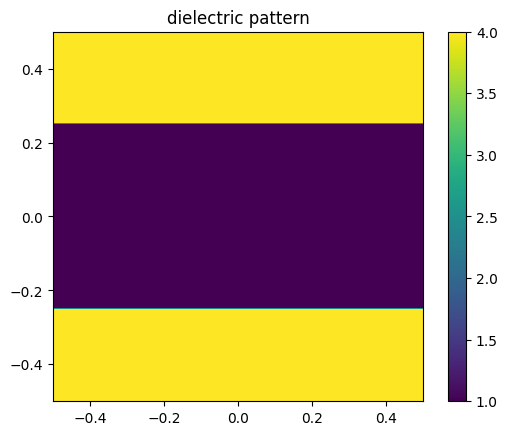

In [96]:
### some params
DEG = np.pi/180
Ny=Nx=1000 ### resolution for dielectric pattern
eps = np.ones([Ny,Nx])*4 ### uniform dielectric slab
radius = 0.25
thickness = 0.2
xs,ys = np.linspace(-0.5,0.5,Nx), np.linspace(-0.5,0.5,Ny)
xs,ys = np.meshgrid(xs,ys)
eps[ys**2 < radius**2] = 1 ### air holes in dielectric slab
plt.imshow(eps,extent=[-0.5,0.5,-0.5,0.5]); 
plt.colorbar(); plt.title('dielectric pattern'); plt.show()
### frequencies to scan through:
freqs = np.linspace(0.51,0.99,101)
thetas = np.linspace(1e-4,89,101) * DEG
inds = range(1,6)

### convergence first
seems can use ind=3 for num_rep up to 3

In [59]:
num_rep = 3
### keeping a=1, then effectively smaller thickness and higher freq
thickness_new = thickness / num_rep
freqs_new = freqs * num_rep
eps_new = np.tile(eps,(num_rep,1))

try:
    trans = np.load(f'1example4-trans-{num_rep}.pkl',allow_pickle=True)
except Exception as e:
    print(e)
    trans = []
    kxkys = []
    twist = 0*DEG
    for ind in inds:
        NM = (2*ind+1)**2
        NMNM = NM**2
        obj = rcwa([eps_new,None,eps_new], [thickness_new,0,thickness_new], [1,1,2], gap_layer_indices=[1], twist=twist, N=0, M=ind, verbose=0)
        for freq in tqdm(freqs_new):
            obj.set_freq_k(freq, (0, 0))
            (r,t), (reflected,transmitted) = obj.get_RT(0,1)
            trans.append(t)
    trans = np.array(trans).reshape(len(inds),len(freqs))
    trans.dump(f'example4-trans-{num_rep}.pkl')

[Errno 2] No such file or directory: '1example4-trans-3.pkl'


100%|██████████| 101/101 [00:00<00:00, 368.43it/s]


Text(0.5, 1.0, '3')

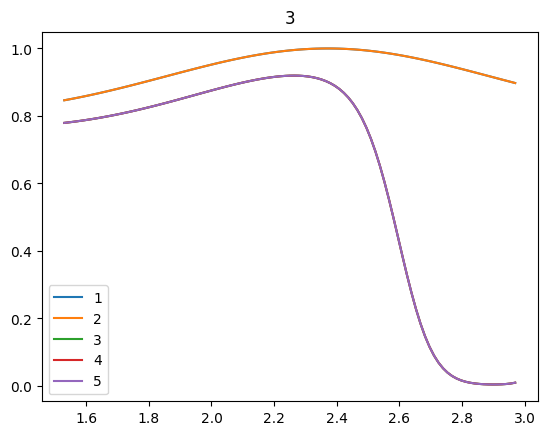

In [60]:
plt.plot(freqs_new,trans.T)
plt.legend(inds)
plt.title(f'{num_rep}')

# get band structure

In [134]:
def perturb(eps,amp=0.3):
    delta = amp*np.sin(np.linspace(0,np.pi*2,len(eps))).reshape(-1,1)
    eps = (1+delta) * eps
    return eps
def get_band(num_rep=1,ind=3,mod_func=None,show=True):
    ### keeping a=1, then effectively smaller thickness and higher freq
    thickness_new = thickness / num_rep
    freqs_new = freqs * num_rep
    eps_new = np.tile(eps,(num_rep,1))
    if mod_func is not None:
        eps_new = mod_func(eps_new)
    try:
        trans = np.load(f'1example4-trans-{num_rep}.pkl',allow_pickle=True)
    except Exception as e:
        print(e)
        trans = []
        kxkys = []
        twist = 0*DEG
        NM = (2*ind+1)**2
        NMNM = NM**2
        obj = rcwa([eps_new,None,eps_new], [thickness_new,0,thickness_new], [1,1,2], gap_layer_indices=[1], twist=twist, N=0, M=ind, verbose=0)
        for freq in tqdm(freqs_new):
            for theta in thetas:
                # obj.set_freq_k(freq, (theta, 0*DEG))
                obj.set_freq_k(freq, (theta, 90*DEG))
                (r,t), (reflected,transmitted) = obj.get_RT(0,1)
                trans.append(t)
        trans = np.array(trans).reshape(len(freqs),len(thetas))
        trans.dump(f'example4-trans-{num_rep}.pkl')
    if show:
        plt.imshow(trans,extent=[thetas[0]/DEG,thetas[-1]/DEG,freqs[0],freqs[-1]],aspect='auto',origin='lower')
        plt.colorbar()
    return trans

[Errno 2] No such file or directory: '1example4-trans-1.pkl'


100%|██████████| 101/101 [00:14<00:00,  6.85it/s]


Text(0.5, 1.0, 'h_period=$\\infty$')

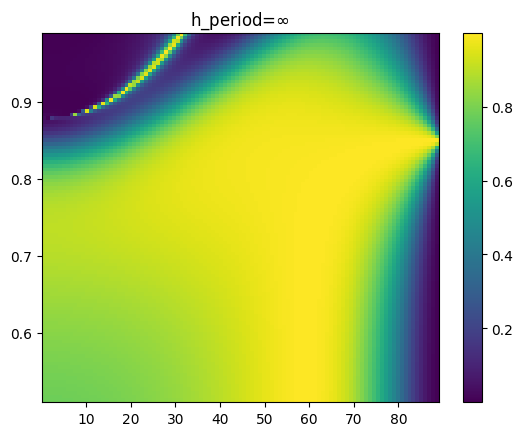

In [130]:
band = get_band()
plt.title(r'h_period=$\infty$')

[Errno 2] No such file or directory: '1example4-trans-2.pkl'


100%|██████████| 101/101 [00:14<00:00,  6.96it/s]


Text(0.5, 1.0, 'h_period=2a')

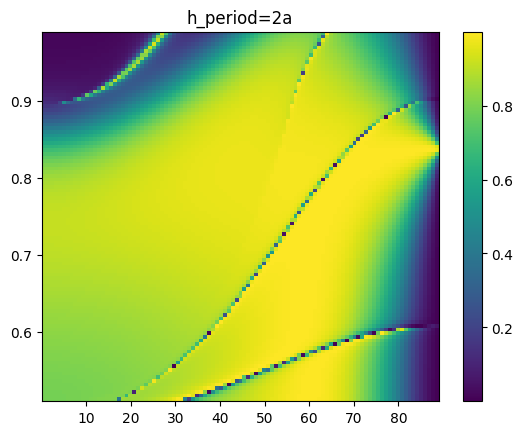

In [131]:
band = get_band(num_rep=2, mod_func=perturb)
plt.title('h_period=2a')

[Errno 2] No such file or directory: '1example4-trans-3.pkl'


100%|██████████| 101/101 [00:14<00:00,  7.00it/s]


Text(0.5, 1.0, 'h_period=3a')

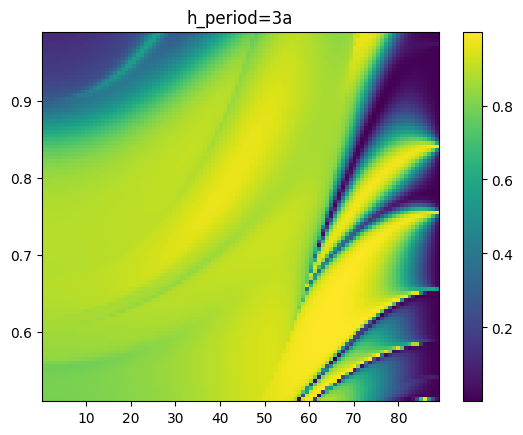

In [132]:
band = get_band(num_rep=3, mod_func=perturb)
plt.title('h_period=3a')

[Errno 2] No such file or directory: '1example4-trans-4.pkl'


100%|██████████| 101/101 [00:31<00:00,  3.21it/s]


Text(0.5, 1.0, 'h_period=4a')

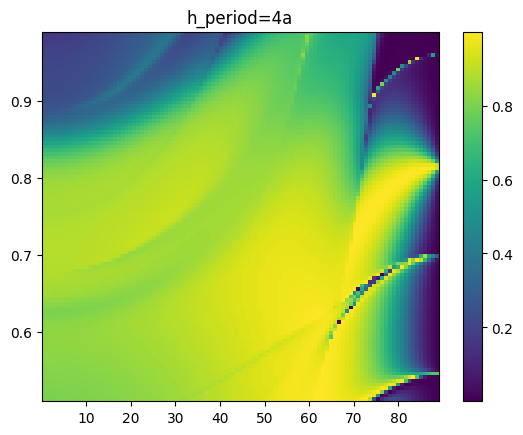

In [133]:
band = get_band(num_rep=4, mod_func=perturb, ind=5)
plt.title('h_period=4a')

[Errno 2] No such file or directory: '1example4-trans-5.pkl'


100%|██████████| 101/101 [01:15<00:00,  1.35it/s]


Text(0.5, 1.0, 'h_period=5a')

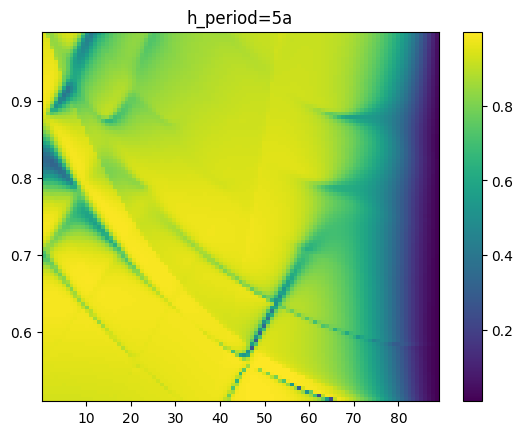

In [137]:
band = get_band(num_rep=5, mod_func=perturb, ind=9)
plt.title('h_period=5a')

[Errno 2] No such file or directory: '1example4-trans-7.pkl'


100%|██████████| 101/101 [03:27<00:00,  2.06s/it]


Text(0.5, 1.0, 'h_period=7a')

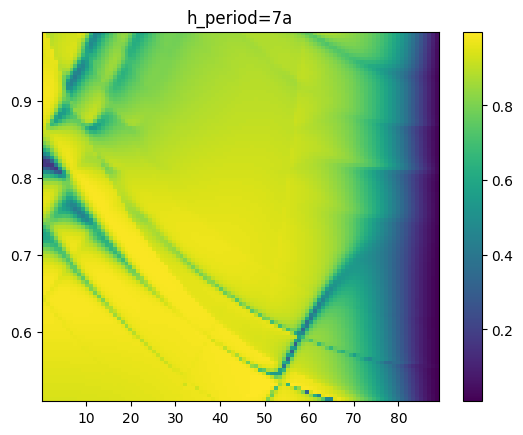

In [150]:
band = get_band(num_rep=7, mod_func=perturb, ind=14)
plt.title('h_period=7a')

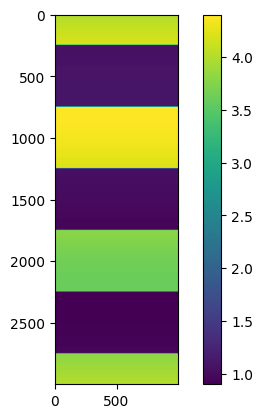

In [106]:
plt.imshow(perturb(eps_new))
plt.colorbar()

In [ ]:
band2 = get_band()

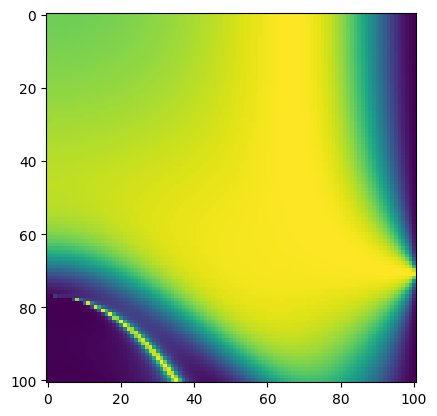

In [69]:
plt.imshow(band)

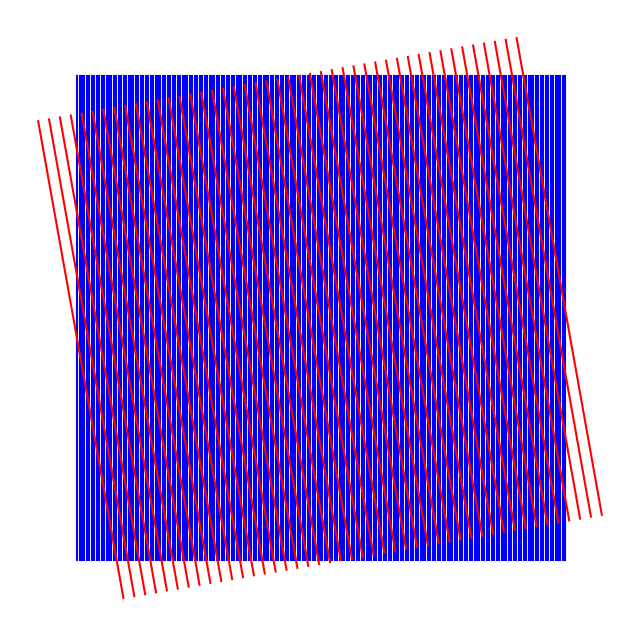

In [155]:
import matplotlib.pyplot as plt
import numpy as np

def draw_lines(angle, spacing, color='black'):
    """
    Draws a set of parallel lines at a specified angle and spacing.

    Parameters:
    - angle: The angle (in degrees) at which the lines are tilted.
    - spacing: The spacing between adjacent lines.
    - color: The color of the lines.
    """
    # Determine the range and interval for drawing lines based on spacing
    for x in np.arange(-20, 20, spacing):
        x_vals = np.array([x, x])
        y_vals = np.array([-20, 20])
        # Apply rotation to the lines
        c, s = np.cos(np.radians(angle)), np.sin(np.radians(angle))
        x_prime = x_vals * c - y_vals * s
        y_prime = x_vals * s + y_vals * c
        plt.plot(x_prime, y_prime, color=color)

plt.figure(figsize=(8, 8))

# Draw the first set of lines
draw_lines(angle=0, spacing=0.2, color='blue')

# Draw the second set of lines with a slight angle difference
draw_lines(angle=10, spacing=0.9, color='red')

plt.axis('off')  # Turn off the axis for a cleaner look
plt.show()
